<a href="https://colab.research.google.com/github/rvdrupal/Machine_Learning_Stanford/blob/master/LogisRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


you can also import file from sysytem

In [191]:
"""
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  """

'\nfrom google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n  '

In [0]:
train=pd.read_csv("Training Data.csv")


Lets Check for the null value.

In [193]:
train.isnull().sum()

patient_id             0
Age                    0
Gender                 0
Prescription_period    0
Diabetes               0
Alcoholism             0
HyperTension           0
Smokes                 0
Tuberculosis           0
Sms_Reminder           0
Adherence              0
dtype: int64

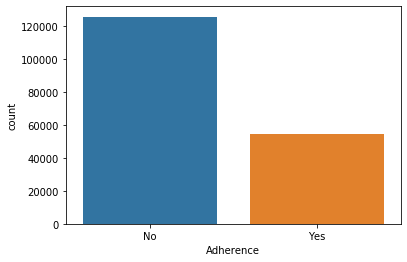

In [194]:
train.Adherence.value_counts()
sns.countplot(x='Adherence',data=train)
plt.show()

Replacing Gender with integer values

In [195]:
train.Gender[train.Gender=='M']=1
train.Gender[train.Gender=='F']=2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cha

Changinng Adherence to 0 for No and 1 for Yes

In [196]:
train.Adherence[train.Adherence=='No']=0
train.Adherence[train.Adherence=='Yes']=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
X=train[['Age','Gender','Prescription_period','Diabetes','Alcoholism','HyperTension','Smokes','Tuberculosis','Sms_Reminder']]
y=train[['Adherence']].astype('int')

Spliting Data into train and validation (67%,33%) respectively

In [0]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [199]:
print("Size of Train Data",np.size(X_train))
print("Size of Test Data",np.size(X_test))



Size of Train Data 1086678
Size of Test Data 535230


In [0]:
LR=LogisticRegression()

In [201]:
model=LR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Caculating Prediction Score and y_pred(Predicted Output)

In [202]:
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred)
score=LR.score(X_test,y_test)
score

0.8812846813519422

In [203]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[37512  3917]
 [ 3143 14898]]


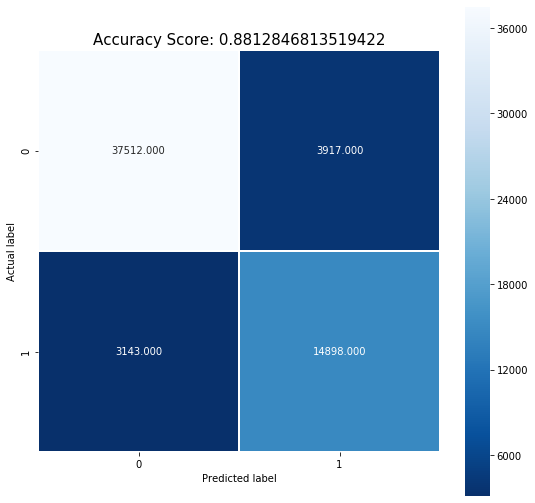

In [204]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91     41429
           1       0.79      0.83      0.81     18041

    accuracy                           0.88     59470
   macro avg       0.86      0.87      0.86     59470
weighted avg       0.88      0.88      0.88     59470



NOW we will predict in test data for that we are converting character into corresponding integer for calculation

*   List item
*   List item



In [205]:
pd_data=pd.read_csv("Test Data.csv")#Prediction Data
pd_data.Gender[pd_data.Gender=='M']=1
pd_data.Gender[pd_data.Gender=='F']=2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Breaking Orignal Data into Patient_id and Rest for Calculation

In [0]:
pd_data_test=pd_data[['Age','Gender','Prescription_period','Diabetes','Alcoholism','HyperTension','Smokes','Tuberculosis','Sms_Reminder']]
pd_data_patientid=pd.DataFrame(pd_data['patient_id'],columns=['patient_id'])

Using Pretrained Model Calculating Adherence of Test Data

In [207]:
pd_data_pred=model.predict(pd_data_test)
pd_data_pred_score=model.score(pd_data_test,pd_data_pred)
pd_data_pred_score


1.0

In [0]:

pd_data_pred=pd.DataFrame(pd_data_pred,columns=['Adherence'])

Rolling back Gender[1,2] back  into Male and Female 

In [209]:
  pd_data_test.Gender[pd_data_test.Gender==1]='M'
  pd_data_test.Gender[pd_data_test.Gender==2]='F'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, 

Rolling back 0 and 1 back to No and Yes

In [0]:
pd_data_pred.Adherence[pd_data_pred.Adherence==0]='No'
pd_data_pred.Adherence[pd_data_pred.Adherence==1]='Yes'

#Merging all the Data into one File

In [0]:
final_data=pd.concat((pd_data_patientid, pd_data_test,pd_data_pred),axis=1)

In [0]:
final_data.to_csv('FinalData.csv')